In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
    
metroidpath = os.path.abspath('../')
if metroidpath not in sys.path:
    sys.path.append(metroidpath)
items = os.listdir(metroidpath)
if 'MES.py' not in items:
    ! jupyter nbconvert --to python ../MES.ipynb --output-dir ../
if 'Remove_Photobleaching.py' not in items:
    ! jupyter nbconvert --to 'python' ../Remove_Photobleaching.ipynb --output-dir ../
if 'BSSD.py' not in items:
    ! jupyter nbconvert --to 'python' ../BSSD.ipynb --output-dir ../
if 'METROID.py' not in items:
    ! jupyter nbconvert --to 'python' ../METROID.ipynb --output-dir ../
import MES as mes
import Remove_Photobleaching as rpb
import BSSD as bssd
import METROID as metroid
    


[NbConvertApp] Converting notebook ../METROID.ipynb to python
[NbConvertApp] Writing 9618 bytes to ../METROID.py


## Mandatory Parameters:

In [2]:
fpath = '../Data\\Cell2'
fr_list = [55.78, 55.78, 55.78, 55.67] #Cell2
transitory=None

## Minimal information provided:
    * **estimated t_sig_onset;**
    - **estimated t_sig_end;**
    - default method ('wPCA');
    - default n_comp (2);
    - default wavelet ('Haar');
    - autoselect source with signal.

In [3]:
v0path = fpath + '\\video0'
transitory = None

ROIs_mask_0, label_ROIs_0, ROIs_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0, corrections_0, \
mask_list_0, sources_0, selected_source_idx_0 = metroid.metroid(v0path, fr_list[0], transitory)

vmidpath = fpath + '\\videos_AP'
transitory = True

ROIs_mask_AP, label_ROIs_AP, ROIs_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP, corrections_AP, \
mask_list_AP, sources_AP, selected_source_idx_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory)


vlastpath = fpath + '\\video_EP'
transitory = False

ROIs_mask_EP, label_ROIs_EP, ROIs_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP, corrections_EP, \
mask_list_EP, sources_EP, selected_source_idx_EP = metroid.metroid(vlastpath, fr_list[-1], transitory)



                                                

## Plot the results:
### 1. Video0

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', 32)
print(brg)
newcolors = brg(np.linspace(0, 1, 32))
black = np.array([0, 0, 0, 1])
newcolors = np.insert(newcolors,0,black,axis=0)
newcmp = ListedColormap(newcolors)

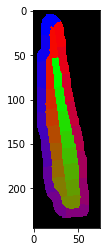

In [6]:
from skimage.measure import label
from skimage import io
from skimage.color import label2rgb
v0 = io.imread(v0path+'\\vid_0.tif')
f0 = v0[0,:,:]
colorslist = []
all_ROIs_mask = np.zeros((ROIs_mask_0.shape[1],ROIs_mask_0.shape[2]))
for j in range(ROIs_mask_0.shape[0]):
    temp = np.logical_xor(all_ROIs_mask,ROIs_mask_0[j,:,:])
    temp2 = np.logical_and(temp,ROIs_mask_0[j,:,:])
    all_ROIs_mask = all_ROIs_mask + (j+1)*temp2
    colorslist.append((0,(j+1)/ROIs_mask_0.shape[0],0))
label_image = label(all_ROIs_mask,background=0)
plt.imshow(all_ROIs_mask, cmap=newcmp)


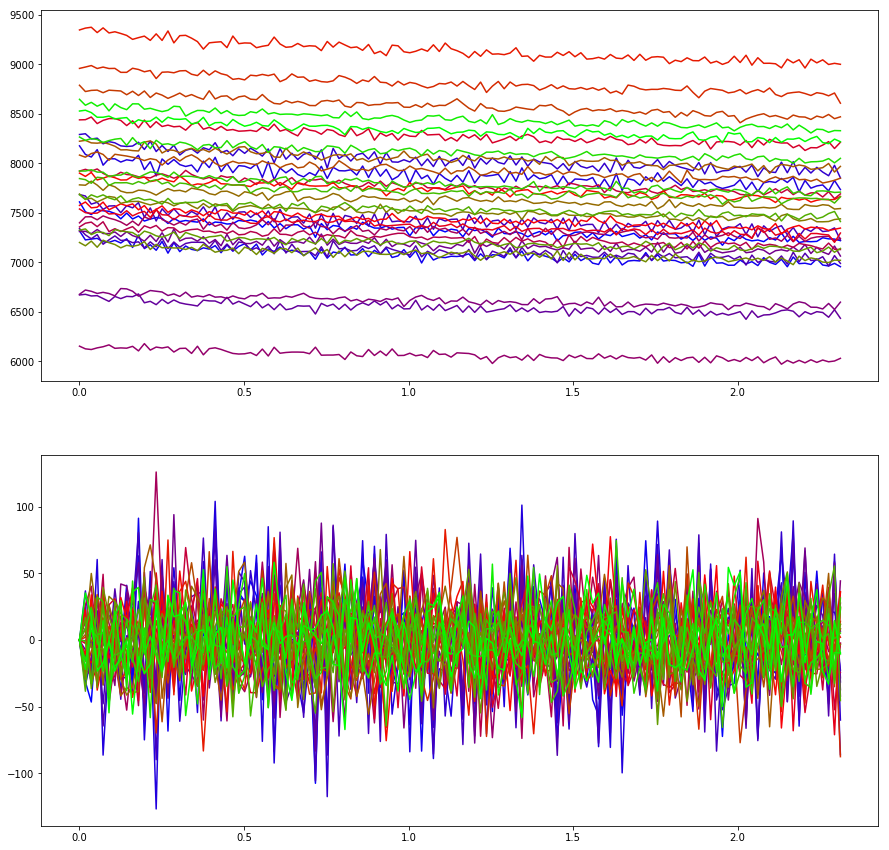

In [7]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(ROIs_mask_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

### 2. Videos_AP

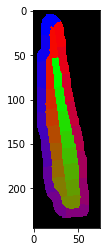

In [8]:
from skimage.measure import label
from skimage import io
from skimage.color import label2rgb
vAP = io.imread(vmidpath+'\\vid_2.tif')
fAP = vAP[0,:,:]

all_ROIs_mask = np.zeros((ROIs_mask_AP.shape[1],ROIs_mask_AP.shape[2]))
for j in range(ROIs_mask_AP.shape[0]):
    temp = np.logical_xor(all_ROIs_mask,ROIs_mask_AP[j,:,:])
    temp2 = np.logical_and(temp,ROIs_mask_AP[j,:,:])
    all_ROIs_mask = all_ROIs_mask + (j+1)*temp2
label_image = label(all_ROIs_mask,background=0)
plt.imshow(all_ROIs_mask, cmap=newcmp)

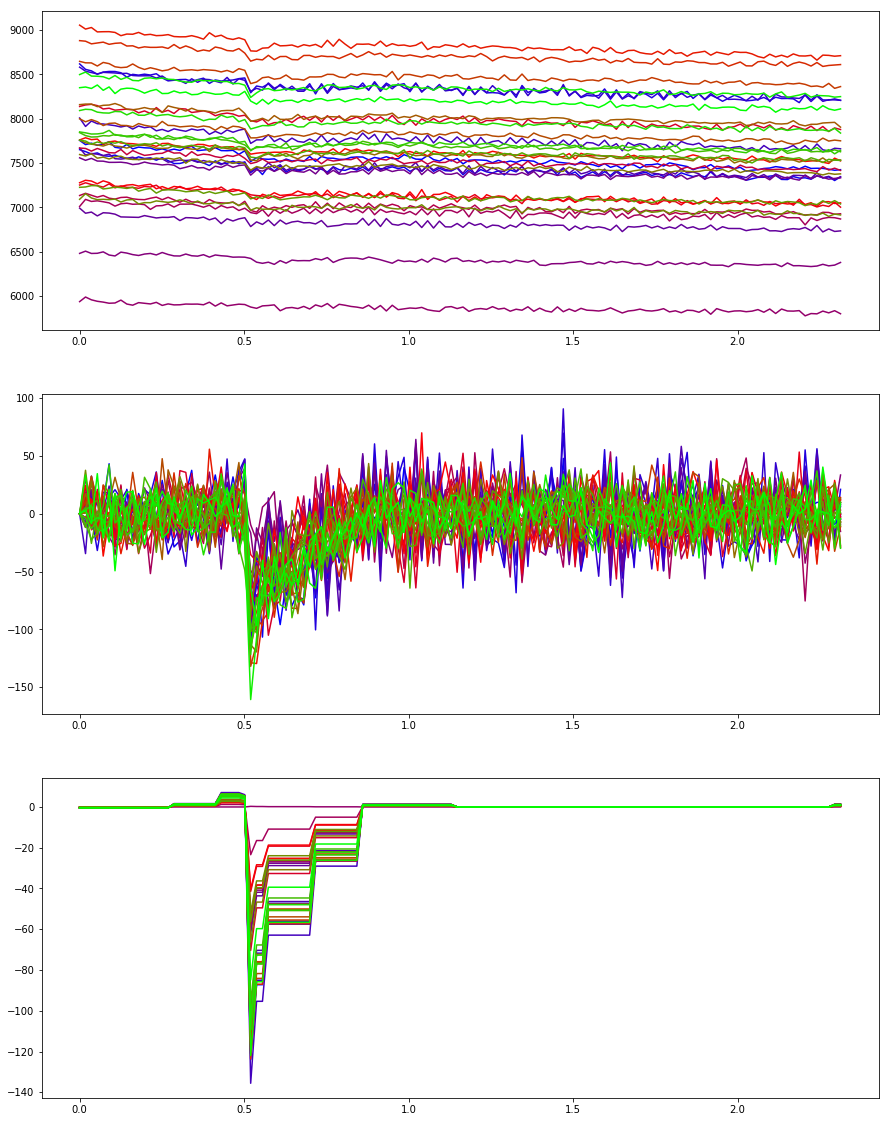

In [9]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(ROIs_mask_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_filtered_AP[:,j],color=newcolors[j+1,:])

### 3. Video_EP

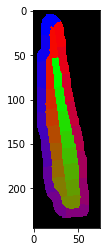

In [10]:
vEP = io.imread(vlastpath+'\\vid_3.tif')
fEP = vEP[0,:,:]

all_ROIs_mask = np.zeros((ROIs_mask_EP.shape[1],ROIs_mask_EP.shape[2]))
for j in range(ROIs_mask_EP.shape[0]):
    temp = np.logical_xor(all_ROIs_mask,ROIs_mask_EP[j,:,:])
    temp2 = np.logical_and(temp,ROIs_mask_EP[j,:,:])
    all_ROIs_mask = all_ROIs_mask + (j+1)*temp2
label_image = label(all_ROIs_mask,background=0)
plt.imshow(all_ROIs_mask, cmap=newcmp)

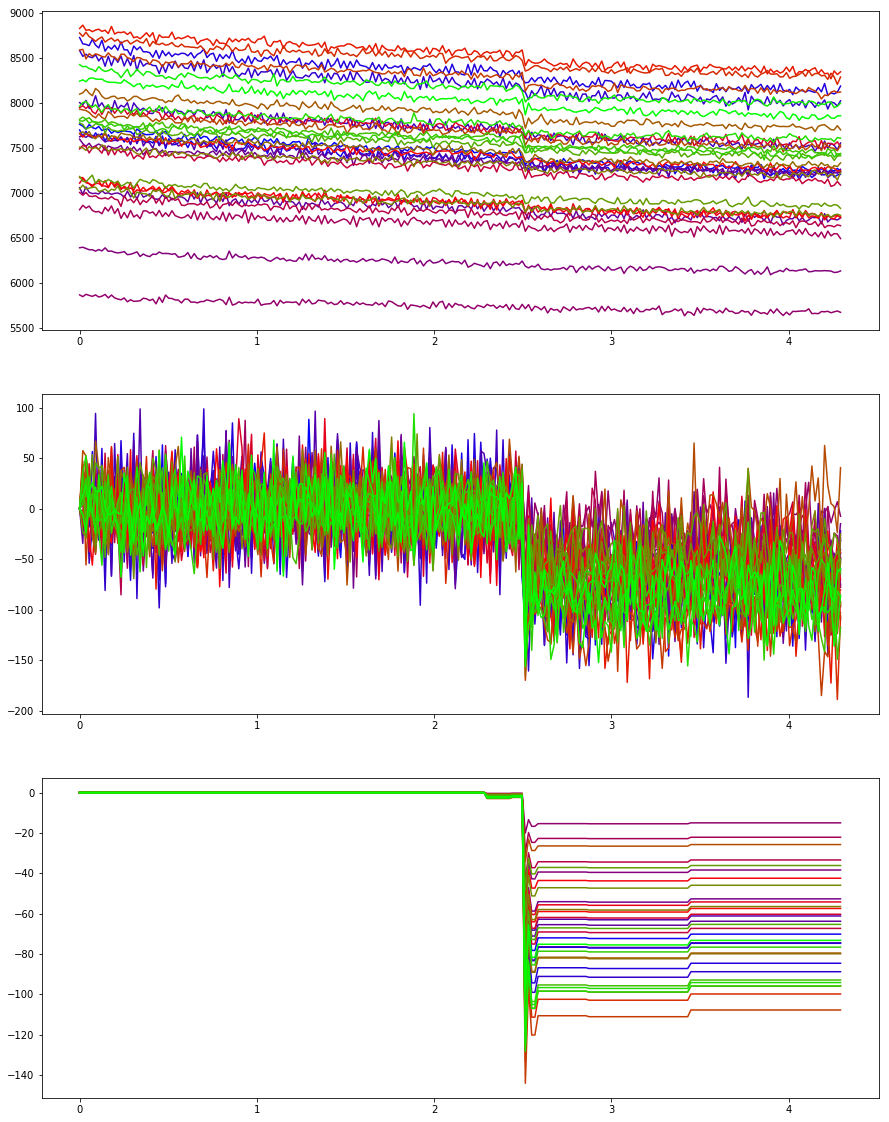

In [11]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(ROIs_mask_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_filtered_EP[:,j],color=newcolors[j+1,:])

## Calibration

## More information provided:
    - **estimated t_sig_onset = 0,5sec (2.5sec for EP video);**
    - **estimated t_sig_end = 1sec (None for EP video);**
    - default method ('wPCA');
    - default n_comp (2);
    - wavelet = 'dmey' for AP videos and 'Haar' fpr EP video;
    - manual selection of source with signal.

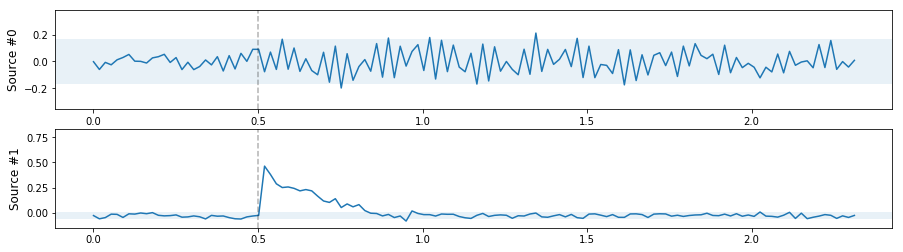

Enter one or more sources number (separate numbers by "," if number of sources > 1): 1


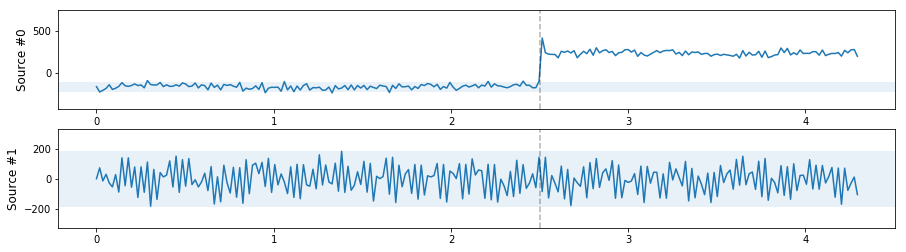

Enter one or more sources number (separate numbers by "," if number of sources > 1): 0


In [12]:
v0path = fpath + '\\video0'
transitory = None

ROIs_mask_0, label_ROIs_0, ROIs_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0, corrections_0, \
mask_list_0, sources_0, selected_source_idx_0 = metroid.metroid(v0path, fr_list[0], transitory)

vmidpath = fpath + '\\videos_AP'
transitory = True
t_sig_onset = 0.5
t_sig_end = 1
n_comp = 2
wavelet = 'dmey'
method = 'ICA'
autoselect = 'manual'

ROIs_mask_AP, label_ROIs_AP, ROIs_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP, corrections_AP, \
mask_list_AP, sources_AP, selected_source_idx_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)


vlastpath = fpath + '\\video_EP'
transitory = False
t_sig_onset = 2.5
t_sig_end = None
n_comp = 2
wavelet = 'Haar'
method = 'wPCA'
autoselect = 'manual'

ROIs_mask_EP, label_ROIs_EP, ROIs_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP, corrections_EP, \
mask_list_EP, sources_EP, selected_source_idx_EP = metroid.metroid(vlastpath, fr_list[-1],transitory,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)



                                                

## Plot the results:
### 1. Video0

In [13]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', 32)
print(brg)
newcolors = brg(np.linspace(0, 1, 32))
black = np.array([0, 0, 0, 1])
newcolors = np.insert(newcolors,0,black,axis=0)
newcmp = ListedColormap(newcolors)

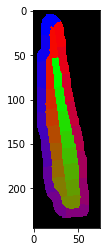

In [14]:
from skimage.measure import label
from skimage import io
from skimage.color import label2rgb
v0 = io.imread(v0path+'\\vid_0.tif')
f0 = v0[0,:,:]
colorslist = []
all_ROIs_mask = np.zeros((ROIs_mask_0.shape[1],ROIs_mask_0.shape[2]))
for j in range(ROIs_mask_0.shape[0]):
    temp = np.logical_xor(all_ROIs_mask,ROIs_mask_0[j,:,:])
    temp2 = np.logical_and(temp,ROIs_mask_0[j,:,:])
    all_ROIs_mask = all_ROIs_mask + (j+1)*temp2
    colorslist.append((0,(j+1)/ROIs_mask_0.shape[0],0))
label_image = label(all_ROIs_mask,background=0)
plt.imshow(all_ROIs_mask, cmap=newcmp)


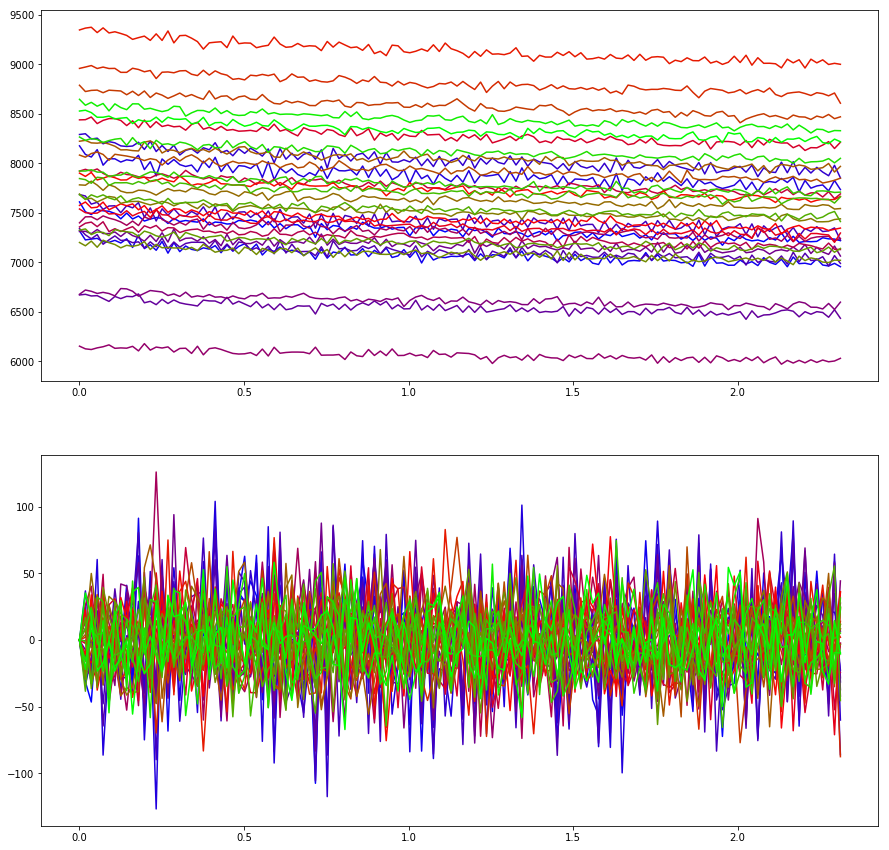

In [15]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(ROIs_mask_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

### 2. Videos_AP

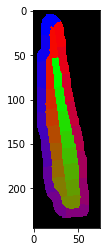

In [16]:
from skimage.measure import label
from skimage import io
from skimage.color import label2rgb
vAP = io.imread(vmidpath+'\\vid_2.tif')
fAP = vAP[0,:,:]

all_ROIs_mask = np.zeros((ROIs_mask_AP.shape[1],ROIs_mask_AP.shape[2]))
for j in range(ROIs_mask_AP.shape[0]):
    temp = np.logical_xor(all_ROIs_mask,ROIs_mask_AP[j,:,:])
    temp2 = np.logical_and(temp,ROIs_mask_AP[j,:,:])
    all_ROIs_mask = all_ROIs_mask + (j+1)*temp2
label_image = label(all_ROIs_mask,background=0)
plt.imshow(all_ROIs_mask, cmap=newcmp)

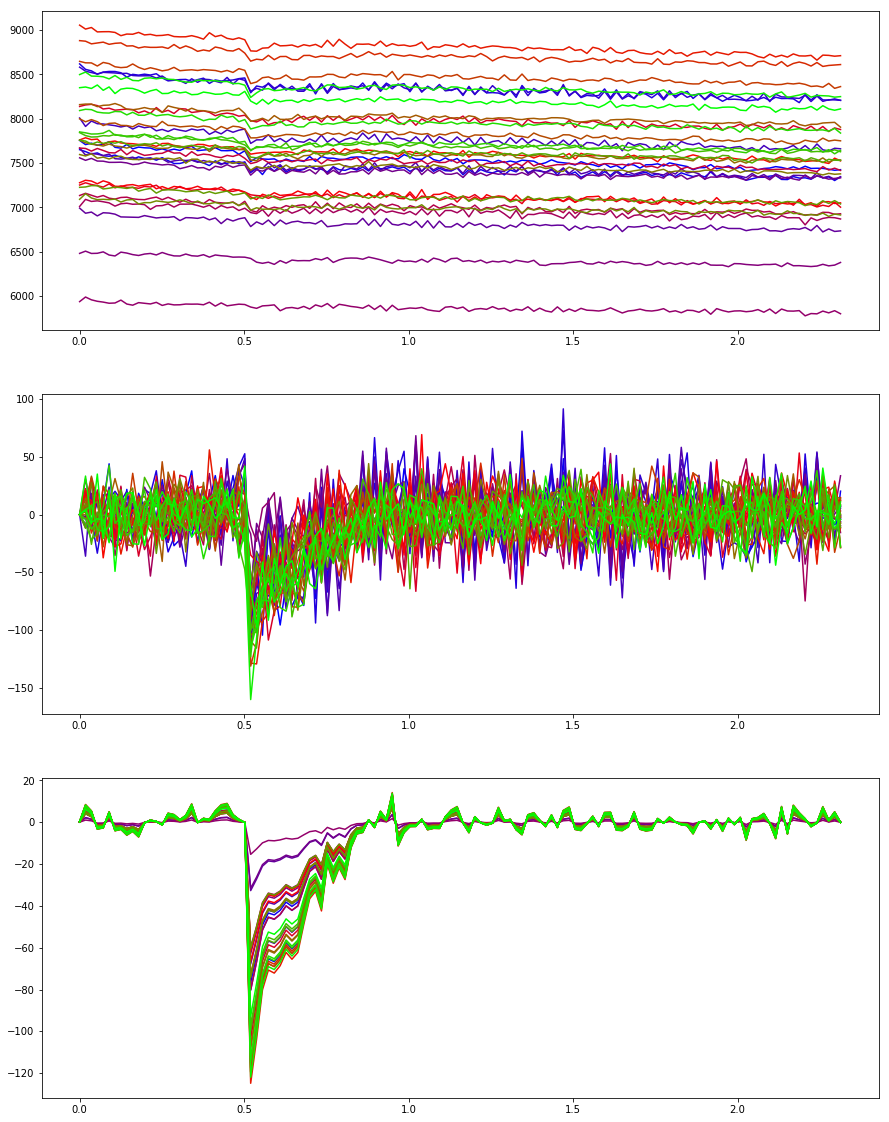

In [17]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(ROIs_mask_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_filtered_AP[:,j],color=newcolors[j+1,:])

### 3. Video_EP

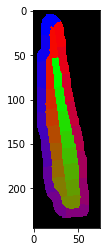

In [18]:
vEP = io.imread(vlastpath+'\\vid_3.tif')
fEP = vEP[0,:,:]

all_ROIs_mask = np.zeros((ROIs_mask_EP.shape[1],ROIs_mask_EP.shape[2]))
for j in range(ROIs_mask_EP.shape[0]):
    temp = np.logical_xor(all_ROIs_mask,ROIs_mask_EP[j,:,:])
    temp2 = np.logical_and(temp,ROIs_mask_EP[j,:,:])
    all_ROIs_mask = all_ROIs_mask + (j+1)*temp2
label_image = label(all_ROIs_mask,background=0)
plt.imshow(all_ROIs_mask, cmap=newcmp)

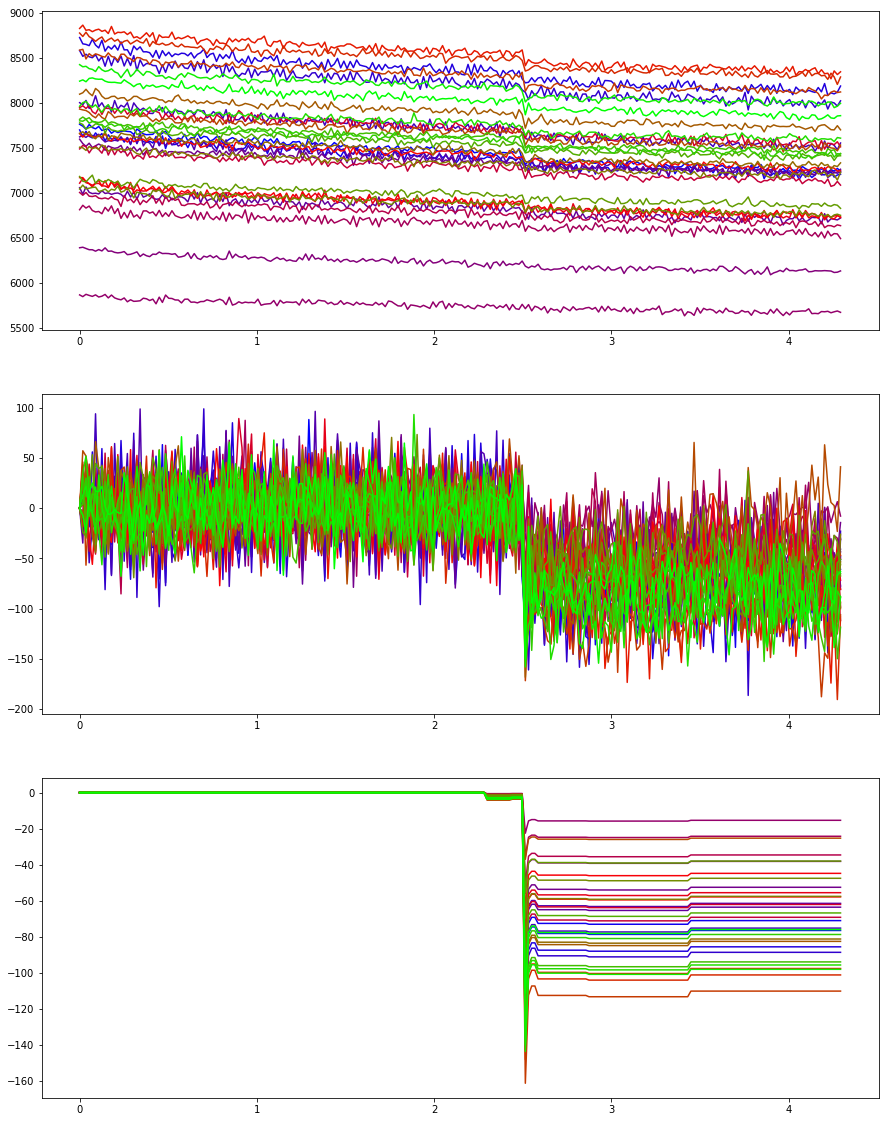

In [19]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(ROIs_mask_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_filtered_EP[:,j],color=newcolors[j+1,:])